In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Import Cognitive Survey Data
file_path = 'Good Life Camp_ Affective Survey (Responses).xlsx' 
df = pd.read_excel(file_path)
df.head(2)

,Timestamp,Pilot Test ID,[POM1] Tense,[POM2] Angry,[POM3] Worn Out,[POM4] Unhappy,[POM5] Proud,[POM6] Lively,[POM7] Confused,[POM8] Sad,...,[BFI35] I see myself as someone who prefers work that is routine,"[BFI36] I see myself as someone who is outgoing, sociable",[BFI37] I see myself as someone who is sometimes rude to others,[BFI38] I see myself as someone who makes plans and follows through with them,[BFI39] I see myself as someone who gets nervous easily,"[BFI40] I see myself as someone who likes to reflect, play with ideas",[BFI41] I see myself as someone who has few artistic interests,[BFI42] I see myself as someone who likes to cooperate with others,[BFI43] I see myself as someone who is easily distracted,"[BFI44] I see myself as someone who is sophisticated in art, music, or literature"
0,2025-04-06 08:24:04.906,TEST,0,0,1,0,1,1,0,0,...,2,4,2,5,1,3,4,4,4,3
1,2025-04-08 19:08:11.965,GLC001,0,0,0,0,2,2,0,0,...,1,2,2,4,1,5,5,5,1,2


# 1. Profile of Mood States (POMS)

The Profile of Mood States (POMS) is designed to assess a person's current mood state. Participants rate how strongly they feel certain adjectives (like 'Tense', 'Lively', 'Sad') on a scale (0='Not at all' to 4='Extremely').

* **Scoring:** Here, we use a short-form version of POMS that includes six subscales, including a positive (Vigor) mood dimension and five negative mood dimensions (Tension, Depression, Anger, Vigor, Fatigue, Confusion). Each subscale score is calculated by directly summing the ratings for the specific items belonging to that subscale. A Total Mood Disturbance (TMD) score is also calculated to give an overall measure of negative mood.

* **Total Mood Disturbance (TMD) Score:** This provides an overall index of negative mood state. It's calculated by: 
    1.  Summing the scores of the negative mood states (Tension, Depression, Anger, Fatigue, Confusion).
    2.  **Subtracting** the Vigor score (as Vigor represents positive mood, it reduces the overall disturbance score).
    3.  Adding a constant of **100** (this is standard practice to prevent negative TMD scores).
 
TMD is calculated using the following formula: `TMD = (Tension + Depression + Anger + Fatigue + Confusion) - Vigor + 100`

In [2]:
# Create running list of all scores
all_score_names = []

In [3]:
# Extract and convert all POMS columns
poms_cols = [col for col in df.columns if col.startswith('[POM')]
poms_df = df[poms_cols].apply(pd.to_numeric, errors='coerce')

# Confirm how many POMS columns were found
print(f"Identified {len(poms_cols)} POMS columns for processing.")
poms_df.head(2)

Identified 40 POMS columns for processing.


,[POM1] Tense,[POM2] Angry,[POM3] Worn Out,[POM4] Unhappy,[POM5] Proud,[POM6] Lively,[POM7] Confused,[POM8] Sad,[POM9] Active,[POM10] On-edge,...,[POM31] Satisfied,[POM32] Bewildered,[POM33] Furious,[POM34] Full of Pep,[POM35] Worthless,[POM36] Forgetful,[POM37] Vigorous,[POM38] Uncertain about things,[POM39] Bushed,[POM40] Embarrassed
0,0,0,1,0,1,1,0,0,1,0,...,3,0,0,0,0,1,1,0,1,0
1,0,0,0,0,2,2,0,0,3,0,...,1,0,0,3,1,0,3,0,0,0


In [4]:
# POMS Scoring Key
# Mapping item numbers to standard subscales
# Note: Items 5, 12, 19, 25, 31, 40 are part of the 40 items but not used in the standard 6 subscales or the common TMD calculation.
poms_items = {
    'Tension': [1, 10, 15, 16, 23, 28, 38], # Tension-Anxiety
    'Depression': [4, 8, 14, 21, 24, 29, 35], # Depression-Dejection
    'Anger': [2, 11, 20, 22, 26, 33], # Anger-Hostility
    'Fatigue': [3, 18, 27, 30, 39], # Fatigue-Inertia
    'Confusion': [7, 17, 32, 36], # Confusion-Bewilderment
    'Vigor': [6, 9, 13, 34, 37] # Vigor-Activity
}

In [5]:
# Calculate subscale scores
poms_scores = pd.DataFrame()
for scale, item_nums in poms_items.items():
    # Reconstruct full column names based on numbering
    item_cols = [col for col in poms_df.columns if any(col.startswith(f'[POM{num}]') for num in item_nums)]
    poms_scores[f'POMS_{scale}'] = poms_df[item_cols].sum(axis=1).astype(int)

# Calculate Total Mood Disturbance (TMD)
negative_scales = ['Tension', 'Depression', 'Anger', 'Fatigue', 'Confusion']
vigor_scale = 'Vigor'

poms_scores['POMS_TMD'] = (poms_scores[[f'POMS_{scale}' for scale in negative_scales]].sum(axis=1)
                    - poms_scores[f'POMS_{vigor_scale}']
                    + 100)

poms_scores.head(2)

,POMS_Tension,POMS_Depression,POMS_Anger,POMS_Fatigue,POMS_Confusion,POMS_Vigor,POMS_TMD
0,1,0,0,4,2,4,103
1,0,1,0,3,0,14,90


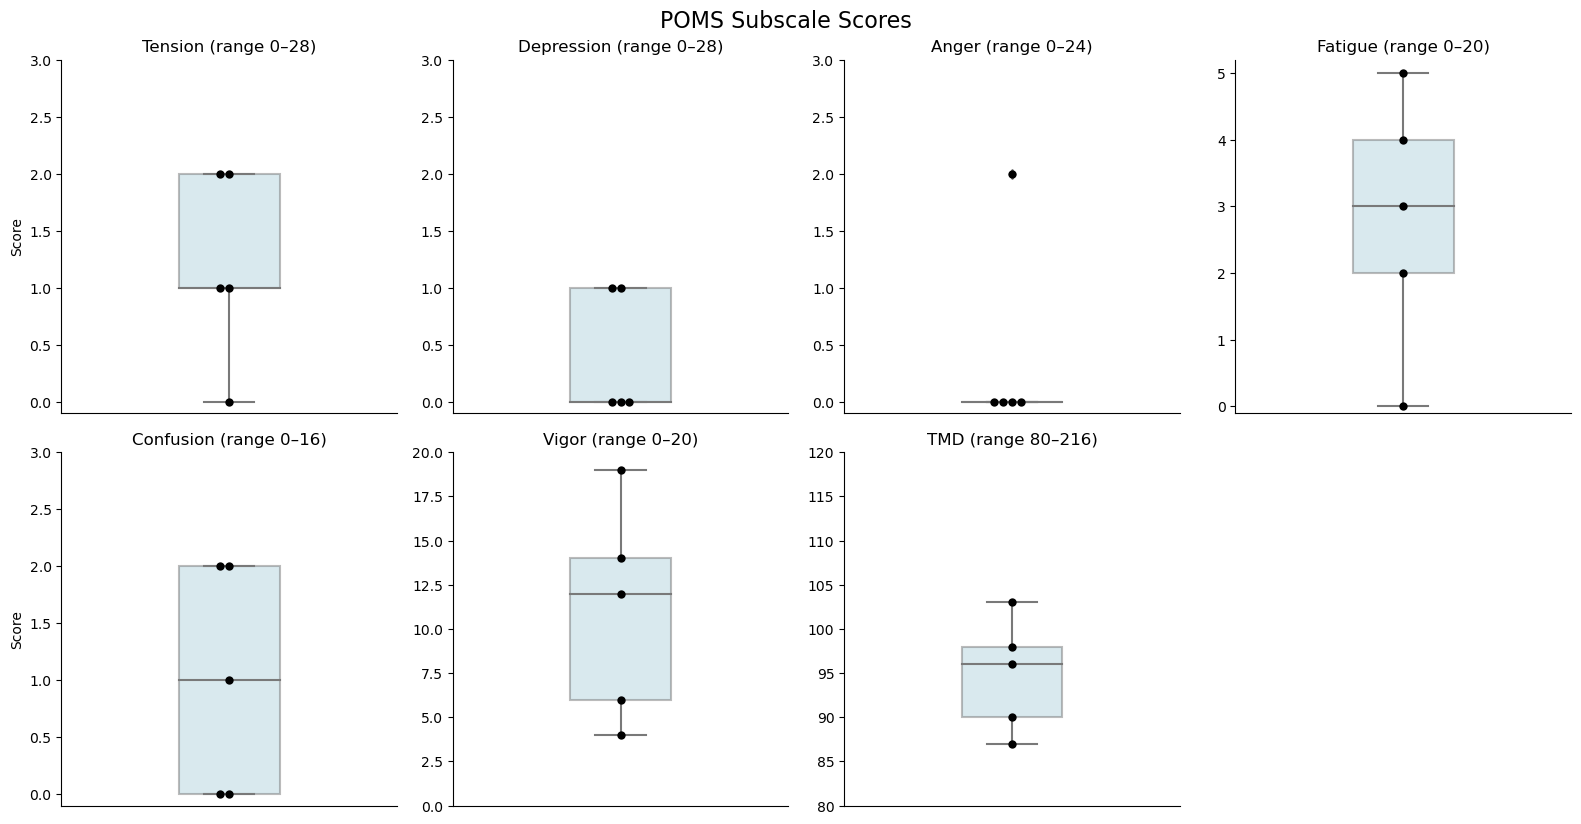

In [6]:
# Compute possible max scores for dynamic labeling
subscale_range = {f'POMS_{k}': len(v) * 4 for k, v in poms_items.items()}

# TMD range calculation
negatives = ['Tension', 'Depression', 'Anger', 'Fatigue', 'Confusion']
tmd_min = 0 - (len(poms_items['Vigor']) * 4) + 100
tmd_max = sum(len(poms_items[s]) * 4 for s in negatives) + 100
subscale_range['POMS_TMD'] = (tmd_min, tmd_max)

# Convert to long format
scores_long = poms_scores.reset_index().melt(
    id_vars='index',
    var_name='Subscale',
    value_name='Score'
)

# Create faceted plot
g = sns.FacetGrid(scores_long, col='Subscale', col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.boxplot, y='Score', color='lightblue', width=0.3, boxprops=dict(alpha=0.5))
g.map_dataframe(sns.swarmplot, y='Score', color='black', size=6)

# Clean up x-axes and set titles with true range
for ax, subscale in zip(g.axes.flatten(), poms_scores.columns):
    ax.set(xticks=[], xlabel="")
    base_name = subscale.replace("POMS_", "")
    if subscale == "POMS_TMD":
        ymin, ymax = subscale_range[subscale]
        ax.set_title(f"{base_name} (range {ymin}–{ymax})")
    else:
        ax.set_title(f"{base_name} (range 0–{subscale_range[subscale]})")

# Explicit manual y-limits per subplot
ax_list = g.axes.flatten()
ax_list[0].set_ylim(-0.1, 3)   # Tension
ax_list[1].set_ylim(-0.1, 3)   # Depression
ax_list[2].set_ylim(-0.1, 3)   # Anger
ax_list[3].set_ylim(-0.1, 5.2)   # Fatigue
ax_list[4].set_ylim(-0.1, 3)   # Confusion
ax_list[5].set_ylim(0, 20)       # Vigor
ax_list[6].set_ylim(80, 120)     # TMD

# Overall title
g.fig.suptitle("POMS Subscale Scores", fontsize=16, y=1.02)
plt.show()

In [7]:
# Extend all_score_names
all_score_names.extend(poms_scores.columns.tolist())
all_score_names

['POMS_Tension',
 'POMS_Depression',
 'POMS_Anger',
 'POMS_Fatigue',
 'POMS_Confusion',
 'POMS_Vigor',
 'POMS_TMD']

## 2. Montgomery–Asberg Depression Rating Scale (MADRS)

The MADRS is a widely used tool for assessing the **severity of depressive symptoms**. It consists of 9 items that evaluate core features of depression, including mood, sleep, appetite, concentration, and pessimism.

Participants rate how strongly they relate to each statement using a scale of **0 to 6**, with higher values indicating more severe symptoms.

- **Scoring**: Each of the 9 items is scored independently. The **total MADRS score** is calculated by summing the scores of all items. Since each item is scored from 0 to 6, the total score ranges from **0 to 54**. The total score provides an index of depression severity, whereby:
  - 0–6 = Minimal  
  - 7–19 = Mild  
  - 20–34 = Moderate  
  - 35–54 = Severe
    

The total score is calculated using the following formula: `MADRS_Total = Mood + Feelings of Unease + Sleep + Appetite + Ability to Concentrate + Initiative + Emotional Involvement + Pessimism + Zest for Life`

*Note: The MADRS was originally developed for clinician-rated interviews, but this version uses a self-report format adapted for participant completion.*

In [8]:
# Extract and score MADRS data
madrs_cols = [col for col in df.columns if col.startswith('[MAD')]
madrs_df = df[madrs_cols]
madrs_numeric = madrs_df.applymap(lambda x: float(str(x).split('–')[0]))
madrs_scores = pd.DataFrame()
madrs_scores['MADRS_Total'] = madrs_numeric.sum(axis=1)
madrs_scores.head(2)

,MADRS_Total
0,2.5
1,3.0


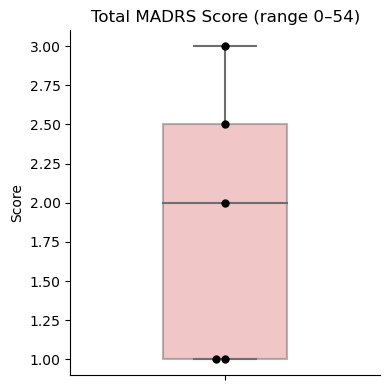

In [9]:
# Calculate possible range of total MADRS
madrs_min = 0
madrs_max = len(madrs_cols) * 6

# Plot Total MADRS Score
plt.figure(figsize=(4, 4))
sns.boxplot(y=madrs_scores['MADRS_Total'], color='lightcoral', width=0.4, boxprops=dict(alpha=0.5))
sns.swarmplot(y=madrs_scores['MADRS_Total'], color='black', size=6)
sns.despine()
plt.title(f"Total MADRS Score (range {madrs_min}–{madrs_max})")
plt.ylabel("Score")
plt.tight_layout()

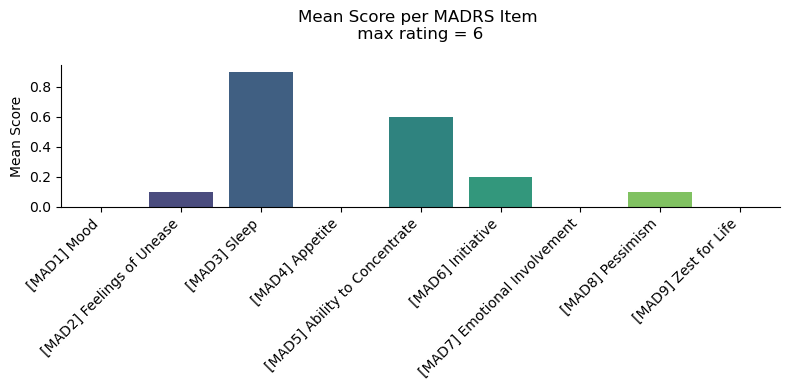

In [10]:
# Barplot of Mean Scores per Item
item_means = madrs_numeric.mean()

plt.figure(figsize=(8, 4))
sns.barplot(x=item_means.index, y=item_means.values, palette='viridis')
sns.despine()
plt.title("Mean Score per MADRS Item \n max rating = 6 \n")
plt.ylabel("Mean Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [11]:
# Extend all_score_names
all_score_names.extend(madrs_scores.columns.tolist())
all_score_names

['POMS_Tension',
 'POMS_Depression',
 'POMS_Anger',
 'POMS_Fatigue',
 'POMS_Confusion',
 'POMS_Vigor',
 'POMS_TMD',
 'MADRS_Total']

## 3. Positive and Negative Affect Schedule (PANAS)

The PANAS is a brief self-report tool designed to assess two broad dimensions of mood: **Positive Affect (PA)** and **Negative Affect (NA)**. These reflect the extent to which a person experiences **positive emotions** (such as enthusiasm or alertness) and **negative emotions** (such as distress or nervousness).

Participants rate how much they have felt each emotion **in the past 2 weeks**, using a scale from **1 to 5**, where:  
1 = Very slightly or not at all  
2 = A little  
3 = Moderately  
4 = Quite a bit  
5 = Extremely

The PANAS consists of 20 items, evenly split into two subscales: 10 items measuring Positive Affect (PA) and 10 items measuring Negative Affect (NA). To calculate the PA score, responses to the 10 positive emotion words are summed. Likewise, the NA score is the sum of responses to the 10 negative emotion words. Each subscale therefore yields a score ranging from **10 to 50**. These scores are interpreted independently — a person can score high on both PA and NA, low on both, or high on one and low on the other.

The subscale scores are calculated using the following formulas:  
`PANAS_PA = Interested + Excited + Strong + Enthusiastic + Proud + Alert + Inspired + Determined + Attentive + Active`  
`PANAS_NA = Distressed + Upset + Guilty + Scared + Hostile + Irritable + Ashamed + Nervous + Jittery + Afraid`

*Note: PANAS scores are sensitive to the time frame used. This version assesses affect "in the past 2 weeks."*


In [12]:
# Extract and clean PANAS data
panas_cols = [col for col in df.columns if col.startswith('[PAN')]
panas_df = df[panas_cols]
panas_df.head(2)

,[PAN1] Interested,[PAN2] Distressed,[PAN3] Excited,[PAN4] Upset,[PAN5] Strong,[PAN6] Guilty,[PAN7] Scared,[PAN8] Hostile,[PAN9] Enthusiastic,[PAN10] Proud,[PAN11] Irritable,[PAN12] Alert,[PAN13] Ashamed,[PAN14] Inspired,[PAN15] Nervous,[PAN16] Determined,[PAN17] Attentive,[PAN18] Jittery,[PAN19] Active,[PAN20] Afraid
0,Extremely,Very slightly or not at all,Quite a bit,Very slightly or not at all,Moderately,Very slightly or not at all,Very slightly or not at all,Very slightly or not at all,Quite a bit,Moderately,Very slightly or not at all,Moderately,Very slightly or not at all,Moderately,Very slightly or not at all,Quite a bit,Moderately,Very slightly or not at all,Extremely,Very slightly or not at all
1,Extremely,Very slightly or not at all,Quite a bit,Very slightly or not at all,Quite a bit,Very slightly or not at all,Very slightly or not at all,Very slightly or not at all,Extremely,Moderately,Very slightly or not at all,Quite a bit,Very slightly or not at all,Extremely,A little,Quite a bit,Extremely,A little,Quite a bit,Very slightly or not at all


In [13]:
# PANAS rating scale mapping
panas_scale = {
    'Very slightly or not at all': 1,
    'A little': 2,
    'Moderately': 3,
    'Quite a bit': 4,
    'Extremely': 5
}

# Apply mapping
panas_numeric = panas_df.applymap(panas_scale.get)
panas_numeric.head(2)

,[PAN1] Interested,[PAN2] Distressed,[PAN3] Excited,[PAN4] Upset,[PAN5] Strong,[PAN6] Guilty,[PAN7] Scared,[PAN8] Hostile,[PAN9] Enthusiastic,[PAN10] Proud,[PAN11] Irritable,[PAN12] Alert,[PAN13] Ashamed,[PAN14] Inspired,[PAN15] Nervous,[PAN16] Determined,[PAN17] Attentive,[PAN18] Jittery,[PAN19] Active,[PAN20] Afraid
0,5,1,4,1,3,1,1,1,4,3,1,3,1,3,1,4,3,1,5,1
1,5,1,4,1,4,1,1,1,5,3,1,4,1,5,2,4,5,2,4,1


In [14]:
# Define subscale items
pa_items = ['[PAN1] Interested', '[PAN3] Excited', '[PAN5] Strong', '[PAN9] Enthusiastic', '[PAN10] Proud',
            '[PAN12] Alert', '[PAN14] Inspired', '[PAN16] Determined', '[PAN17] Attentive', '[PAN19] Active']

na_items = ['[PAN2] Distressed', '[PAN4] Upset', '[PAN6] Guilty', '[PAN7] Scared', '[PAN8] Hostile',
            '[PAN11] Irritable', '[PAN13] Ashamed', '[PAN15] Nervous', '[PAN18] Jittery', '[PAN20] Afraid']

# Compute subscale scores
panas_scores = pd.DataFrame()
panas_scores['PANAS_PA'] = panas_numeric[pa_items].sum(axis=1)
panas_scores['PANAS_NA'] = panas_numeric[na_items].sum(axis=1)

panas_scores.head(2)

,PANAS_PA,PANAS_NA
0,37,10
1,43,12


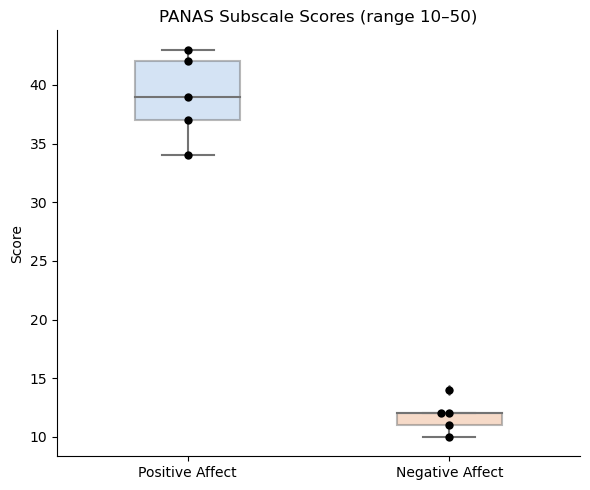

In [15]:
# Prepare for plotting
panas_summary = panas_scores.rename(columns={
    'PANAS_PA': 'Positive Affect',
    'PANAS_NA': 'Negative Affect'
})
panas_melted = panas_summary.melt(var_name='Subscale', value_name='Score')

# Create plot
plt.figure(figsize=(6, 5))
sns.boxplot(x='Subscale', y='Score', data=panas_melted, palette='pastel', width=0.4, boxprops=dict(alpha=0.5))
sns.swarmplot(x='Subscale', y='Score', data=panas_melted, color='black', size=6)
sns.despine()
plt.title("PANAS Subscale Scores (range 10–50)")
plt.ylabel("Score")
plt.xlabel("")
plt.tight_layout()

In [16]:
# Extend all_score_names
all_score_names.extend(panas_scores.columns.tolist())
all_score_names

['POMS_Tension',
 'POMS_Depression',
 'POMS_Anger',
 'POMS_Fatigue',
 'POMS_Confusion',
 'POMS_Vigor',
 'POMS_TMD',
 'MADRS_Total',
 'PANAS_PA',
 'PANAS_NA']

## 4. Generalized Anxiety Disorder (GAD-7)

The GAD-7 is a brief self-report tool designed to screen for and assess the **severity of generalized anxiety symptoms**. It includes 7 items related to nervousness, worry, restlessness, and related symptoms. Each of the 7 items is scored from 0 to 3. The **total GAD-7 score** is the sum of all 7 item scores, for a range from **0 to 21**.

Higher scores indicate greater symptom severity, whereby:

- 0–4 = Minimal anxiety  
- 5–9 = Mild anxiety  
- 10–14 = Moderate anxiety  
- 15–21 = Severe anxiety


In [17]:
# Extract GAD item columns
gad_cols = [col for col in df.columns if col.startswith('[GAD')]
gad_df = df[gad_cols]

# Map responses to numeric values
gad_map = {
    'Not at all': 0,
    'Several days': 1,
    'More than half the days': 2,
    'Nearly every day': 3
}
gad_numeric = gad_df.applymap(gad_map.get)

# Calculate total score 
gad_scores = pd.DataFrame()
gad_scores['GAD7_Total'] = gad_numeric.sum(axis=1)
gad_scores.head(2)

,GAD7_Total
0,2
1,0


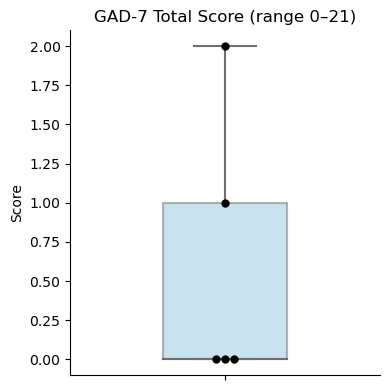

In [18]:
# Plot GAD-7 Scores
plt.figure(figsize=(4, 4))
sns.boxplot(y=gad_scores['GAD7_Total'], color='skyblue', width=0.4, boxprops=dict(alpha=0.5))
sns.swarmplot(y=gad_scores['GAD7_Total'], color='black', size=6)
sns.despine()
plt.title("GAD-7 Total Score (range 0–21)")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

In [19]:
# Extend all_score_names
all_score_names.extend(gad_scores.columns.tolist())
all_score_names

['POMS_Tension',
 'POMS_Depression',
 'POMS_Anger',
 'POMS_Fatigue',
 'POMS_Confusion',
 'POMS_Vigor',
 'POMS_TMD',
 'MADRS_Total',
 'PANAS_PA',
 'PANAS_NA',
 'GAD7_Total']

## 5. Trait Emotional Intelligence Questionnaire – Short Form (TEIQue-SF)

The TEIQue-SF is a 30-item self-report questionnaire designed to assess **trait emotional intelligence (trait EI)** — an individual's typical emotional self-perceptions. Trait EI reflects how people perceive and manage their own emotions, relate to others, and navigate emotional and social situations in daily life.

Participants rate their agreement with each item on a **7-point Likert scale**, where 1 = Completely Disagree and 7 = Completely Agree.

The questionnaire includes a mix of positively and negatively worded statements. For consistency, **16 items are reverse-scored** so that higher numbers always reflect greater emotional intelligence. Reverse-scored items include: `2, 4, 5, 7, 8, 10, 12, 13, 14, 16, 18, 22, 23, 25, 26, 28`

**Scoring**: The total trait EI score is calculated by first reverse-scoring the designated items and then taking the **mean of all 30 item responses**. Final scores range from 1 to 7, with higher scores indicating greater trait emotional intelligence. This version of the TEIQue-SF focuses on the **global score**, which demonstrates strong internal consistency and is commonly used in research. Although the questionnaire also samples from four broader factors (Well-being, Emotionality, Sociability, and Self-control), these are not separately scored in this version.

*Reference: Cooper & Petrides (2010); psychometriclab.com*

In [20]:
# Extract TEIQue-SF columns
tei_cols = [col for col in df.columns if col.startswith('[TEI')]
tei_df = df[tei_cols]
tei_df = tei_df.rename(columns={col: f'TEI{i+1}' for i, col in enumerate(tei_cols)})

# Reverse-score the appropriate items
reverse_items = ['TEI2', 'TEI4', 'TEI5', 'TEI7', 'TEI8', 'TEI10', 'TEI12', 'TEI13',
                 'TEI14', 'TEI16', 'TEI18', 'TEI22', 'TEI23', 'TEI25', 'TEI26', 'TEI28']

tei_df[reverse_items] = tei_df[reverse_items].apply(lambda x: 8 - x)

# Compute total TEI score 
tei_scores = pd.DataFrame()
tei_scores['TEIQue_Total'] = tei_df.mean(axis=1)
tei_scores.head(2)

,TEIQue_Total
0,6.000000
1,5.733333


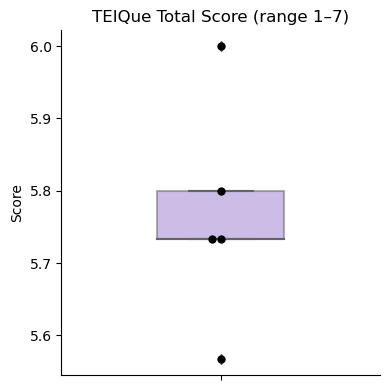

In [21]:
# Plot Total TEIQue Scores
plt.figure(figsize=(4, 4))
sns.boxplot(y=tei_scores['TEIQue_Total'], color='mediumpurple', width=0.4, boxprops=dict(alpha=0.5))
sns.swarmplot(y=tei_scores['TEIQue_Total'], color='black', size=6)
sns.despine()
plt.title("TEIQue Total Score (range 1–7)")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

In [22]:
# Extend all_score_names
all_score_names.extend(tei_scores.columns.tolist())
all_score_names

['POMS_Tension',
 'POMS_Depression',
 'POMS_Anger',
 'POMS_Fatigue',
 'POMS_Confusion',
 'POMS_Vigor',
 'POMS_TMD',
 'MADRS_Total',
 'PANAS_PA',
 'PANAS_NA',
 'GAD7_Total',
 'TEIQue_Total']

## 6. Big Five Inventory (BFI-44)

The Big Five Inventory (BFI-44) is a self-report questionnaire designed to measure five broad dimensions of personality. It is widely used in both research and clinical settings due to its strong psychometric properties and brevity. Each of the 44 items is rated on a **1 to 5 scale**, where 1 = Disagree strongly and 5 = Agree strongly.

For consistency, some items are reverse-scored so that higher numbers always reflect more of the trait being measured. Each trait score is computed as the average of its corresponding items, after accounting for any necessary reverse scoring.

The five personality dimensions measured are:

- **Extraversion**: Outgoingness, energy, and sociability  
- **Agreeableness**: Compassion, trust, and cooperation  
- **Conscientiousness**: Organization, responsibility, and self-discipline  
- **Neuroticism**: Tendency toward negative emotions such as anxiety and moodiness  
- **Openness to Experience**: Curiosity, imagination, and openness to new ideas

In [23]:
# Extract BFI columns
bfi_cols = [col for col in df.columns if col.startswith('[BFI')]
bfi_df = df[bfi_cols].rename(columns={col: f'BFI{i+1}' for i, col in enumerate(bfi_cols)})

# Define reverse-scored items
reverse_items = ['BFI6', 'BFI21', 'BFI31',  # Extraversion
                 'BFI2', 'BFI12', 'BFI27', 'BFI37',  # Agreeableness
                 'BFI8', 'BFI18', 'BFI23', 'BFI43',  # Conscientiousness
                 'BFI9', 'BFI24', 'BFI34',  # Neuroticism
                 'BFI35', 'BFI41']  # Openness

# Reverse-score items
bfi_df[reverse_items] = bfi_df[reverse_items].apply(lambda x: 6 - x)

# Step 4: Define trait item groupings
bfi_scores = pd.DataFrame()
bfi_scores['BFI_Extraversion'] = bfi_df[['BFI1', 'BFI6', 'BFI11', 'BFI16', 'BFI21', 'BFI26', 'BFI31', 'BFI36']].mean(axis=1)
bfi_scores['BFI_Agreeableness'] = bfi_df[['BFI2', 'BFI7', 'BFI12', 'BFI17', 'BFI22', 'BFI27', 'BFI32', 'BFI37', 'BFI42']].mean(axis=1)
bfi_scores['BFI_Conscientiousness'] = bfi_df[['BFI3', 'BFI8', 'BFI13', 'BFI18', 'BFI23', 'BFI28', 'BFI33', 'BFI38', 'BFI43']].mean(axis=1)
bfi_scores['BFI_Neuroticism'] = bfi_df[['BFI4', 'BFI9', 'BFI14', 'BFI19', 'BFI24', 'BFI29', 'BFI34', 'BFI39']].mean(axis=1)
bfi_scores['BFI_Openness'] = bfi_df[['BFI5', 'BFI10', 'BFI15', 'BFI20', 'BFI25', 'BFI30', 'BFI35', 'BFI40', 'BFI41', 'BFI44']].mean(axis=1)
bfi_scores = bfi_scores.round(2)
bfi_scores.head(2)

,BFI_Extraversion,BFI_Agreeableness,BFI_Conscientiousness,BFI_Neuroticism,BFI_Openness
0,4.25,4.00,3.78,1.12,3.0
1,3.75,3.89,4.33,2.12,4.3


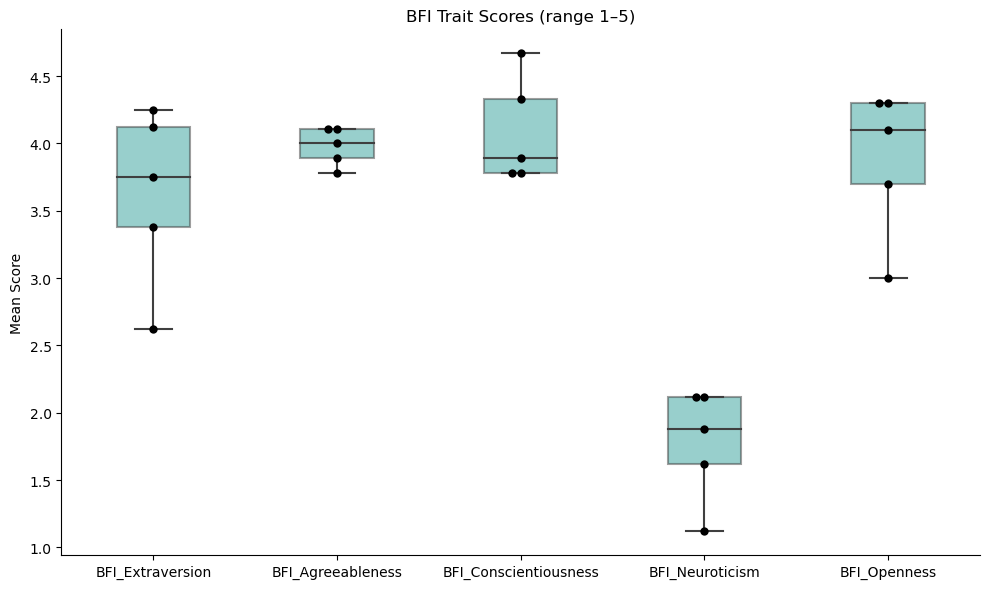

In [24]:
# Plot BFI scores
bfi_long = bfi_scores.reset_index().melt(id_vars='index', var_name='Trait', value_name='Score')

plt.figure(figsize=(10, 6))
sns.boxplot(data=bfi_long, x='Trait', y='Score', color='lightseagreen', width=0.4, boxprops=dict(alpha=0.5))
sns.swarmplot(data=bfi_long, x='Trait', y='Score', color='black', size=6)

sns.despine()
plt.title("BFI Trait Scores (range 1–5)")
plt.ylabel("Mean Score")
plt.xlabel("")
plt.tight_layout()
plt.show()

In [25]:
# Extend all_score_names
all_score_names.extend(bfi_scores.columns.tolist())
all_score_names

['POMS_Tension',
 'POMS_Depression',
 'POMS_Anger',
 'POMS_Fatigue',
 'POMS_Confusion',
 'POMS_Vigor',
 'POMS_TMD',
 'MADRS_Total',
 'PANAS_PA',
 'PANAS_NA',
 'GAD7_Total',
 'TEIQue_Total',
 'BFI_Extraversion',
 'BFI_Agreeableness',
 'BFI_Conscientiousness',
 'BFI_Neuroticism',
 'BFI_Openness']

In [34]:
# === Collect scores for a specific subject ===
subject_index = 3  # Change this to choose another subject

# Prepare a list to hold all rows
records = []

# POMS
poms_vars = ['POMS_Tension', 'POMS_Depression', 'POMS_Anger', 'POMS_Fatigue', 'POMS_Confusion', 'POMS_Vigor', 'POMS_TMD']
for var in poms_vars:
    value = poms_scores.loc[subject_index, var]
    records.append({'Group': 'POMS', 'Variable': var, 'Value': value})

# MADRS
value = madrs_scores.loc[subject_index, 'MADRS_Total']
records.append({'Group': 'MADRS', 'Variable': 'MADRS_Total', 'Value': value})

# PANAS
for var in ['PANAS_PA', 'PANAS_NA']:
    value = panas_scores.loc[subject_index, var]
    records.append({'Group': 'PANAS', 'Variable': var, 'Value': value})

# GAD-7
value = gad_scores.loc[subject_index, 'GAD7_Total']
records.append({'Group': 'GAD7', 'Variable': 'GAD7_Total', 'Value': value})

# TEIQue
value = tei_scores.loc[subject_index, 'TEIQue_Total']
records.append({'Group': 'TEIQue', 'Variable': 'TEIQue_Total', 'Value': value})

# BFI
bfi_vars = ['BFI_Extraversion', 'BFI_Agreeableness', 'BFI_Conscientiousness', 'BFI_Neuroticism', 'BFI_Openness']
for var in bfi_vars:
    value = bfi_scores.loc[subject_index, var]
    records.append({'Group': 'BFI', 'Variable': var, 'Value': value})


# Create final DataFrame
subject_long_df = pd.DataFrame(records)

subject_long_df['Value'] = subject_long_df['Value'].round(2)

subject_long_df.to_csv(f"subject_{subject_index}_long_scores.csv", index=False)
subject_long_df

,Group,Variable,Value
0,POMS,POMS_Tension,2.00
1,POMS,POMS_Depression,0.00
2,POMS,POMS_Anger,0.00
3,POMS,POMS_Fatigue,0.00
4,POMS,POMS_Confusion,0.00
5,POMS,POMS_Vigor,6.00
6,POMS,POMS_TMD,96.00
7,MADRS,MADRS_Total,1.00
8,PANAS,PANAS_PA,34.00
9,PANAS,PANAS_NA,14.00


In [29]:
df

,Timestamp,Pilot Test ID,[POM1] Tense,[POM2] Angry,[POM3] Worn Out,[POM4] Unhappy,[POM5] Proud,[POM6] Lively,[POM7] Confused,[POM8] Sad,...,[BFI35] I see myself as someone who prefers work that is routine,"[BFI36] I see myself as someone who is outgoing, sociable",[BFI37] I see myself as someone who is sometimes rude to others,[BFI38] I see myself as someone who makes plans and follows through with them,[BFI39] I see myself as someone who gets nervous easily,"[BFI40] I see myself as someone who likes to reflect, play with ideas",[BFI41] I see myself as someone who has few artistic interests,[BFI42] I see myself as someone who likes to cooperate with others,[BFI43] I see myself as someone who is easily distracted,"[BFI44] I see myself as someone who is sophisticated in art, music, or literature"
0,2025-04-06 08:24:04.906,TEST,0,0,1,0,1,1,0,0,...,2,4,2,5,1,3,4,4,4,3
1,2025-04-08 19:08:11.965,GLC001,0,0,0,0,2,2,0,0,...,1,2,2,4,1,5,5,5,1,2
2,2025-04-10 15:45:09.286,GLC003,1,0,2,0,3,3,0,0,...,2,4,2,4,2,5,1,4,3,3
3,2025-04-15 19:12:33.809,GLC005,0,0,0,0,0,2,0,0,...,2,1,1,4,1,4,3,4,1,3
4,2025-04-16 10:19:12.362,GLC004,0,0,1,0,3,4,0,0,...,2,4,3,4,2,4,5,4,4,3
